**Step 1:**

The code is structured to fetch and tally the monthly amount of editors that have made edits on to Wikipedia everyday since December 2021. Starting by importing two libraries to set up a base URL for the Wikipedia API, we aggregate the editor metrics for Wikepedia entries from December 2021 to September 29th, 2023. Then it processes the data and extracts the number of edictrs for every day and stores it into a dictionary that has the date as its key. Finally, it prints out our compiled dictionary which contains the count for daily editors.

In [ ]:
import requests

extraction = requests.get(
    "https://wikimedia.org/api/rest_v1/metrics/editors/aggregate/en.wikipedia/all-editor-types/all-page-types/all-activity-levels/daily/20220101/20230929",
    headers={"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:92.0) Gecko/20100101 Firefox/92.0"}
)

dataset = extraction.json()['items'][0]['results']

editors = {}
for item in dataset:
    if 'timestamp' in item:
      timestamp = item['timestamp'][:10]
      num_edits = item['editors']
      editors[timestamp] = num_edits


print(editors)


{'2022-01-01': 20217, '2022-01-02': 21562, '2022-01-03': 22941, '2022-01-04': 23125, '2022-01-05': 23638, '2022-01-06': 23295, '2022-01-07': 23232, '2022-01-08': 21762, '2022-01-09': 22186, '2022-01-10': 24264, '2022-01-11': 24230, '2022-01-12': 24200, '2022-01-13': 24244, '2022-01-14': 23368, '2022-01-15': 21421, '2022-01-16': 22515, '2022-01-17': 23635, '2022-01-18': 24429, '2022-01-19': 24792, '2022-01-20': 24316, '2022-01-21': 24001, '2022-01-22': 22035, '2022-01-23': 23111, '2022-01-24': 24515, '2022-01-25': 24839, '2022-01-26': 25064, '2022-01-27': 24713, '2022-01-28': 23644, '2022-01-29': 22267, '2022-01-30': 22913, '2022-01-31': 24990, '2022-02-01': 24787, '2022-02-02': 24648, '2022-02-03': 24620, '2022-02-04': 24265, '2022-02-05': 22142, '2022-02-06': 23029, '2022-02-07': 24344, '2022-02-08': 25024, '2022-02-09': 24806, '2022-02-10': 24414, '2022-02-11': 23562, '2022-02-12': 21217, '2022-02-13': 22535, '2022-02-14': 23412, '2022-02-15': 24624, '2022-02-16': 24967, '2022-02-17'

**Step 2:**

Here, a DataFrame is created to organize the data collected from the previous script. The DataFrame df is structued with the '**date**' colum which is generated by using a list of comprehension to format the month numbers. The 'editors' column which is populated with the data stored in the daily_revisions list. Finally to_csv method is employed to export this df into to a csv file. This ensures that the index is not included in the output file by setting the index=False.

In [31]:
import pandas as pd
import json
data_frame = pd.DataFrame(list(editors.items()), columns=['date', 'editors'])
data_frame.to_csv('daily_revisions_2022.csv', encoding='utf-8', index=False)
json.dump(editors, open('raw_dataset.json', 'w'))
data_frame.describe

<bound method NDFrame.describe of            date  editors
0    2022-01-01    20217
1    2022-01-02    21562
2    2022-01-03    22941
3    2022-01-04    23125
4    2022-01-05    23638
..          ...      ...
631  2023-09-24    21018
632  2023-09-25    22221
633  2023-09-26    22219
634  2023-09-27    22624
635  2023-09-28    21926

[636 rows x 2 columns]>

**Step 3:**

Here the Matplotlib library is imported to facilitate data visualization, and the previously saved CSV file is loaded into the df. A scatter plot is then generated to visualize the number of Wikipedia edits per day since December 2021, with the figure size specified to ensure adequete space. The title, labels and roation of the x-axis labels are also added to enhance the readability of the visualization.

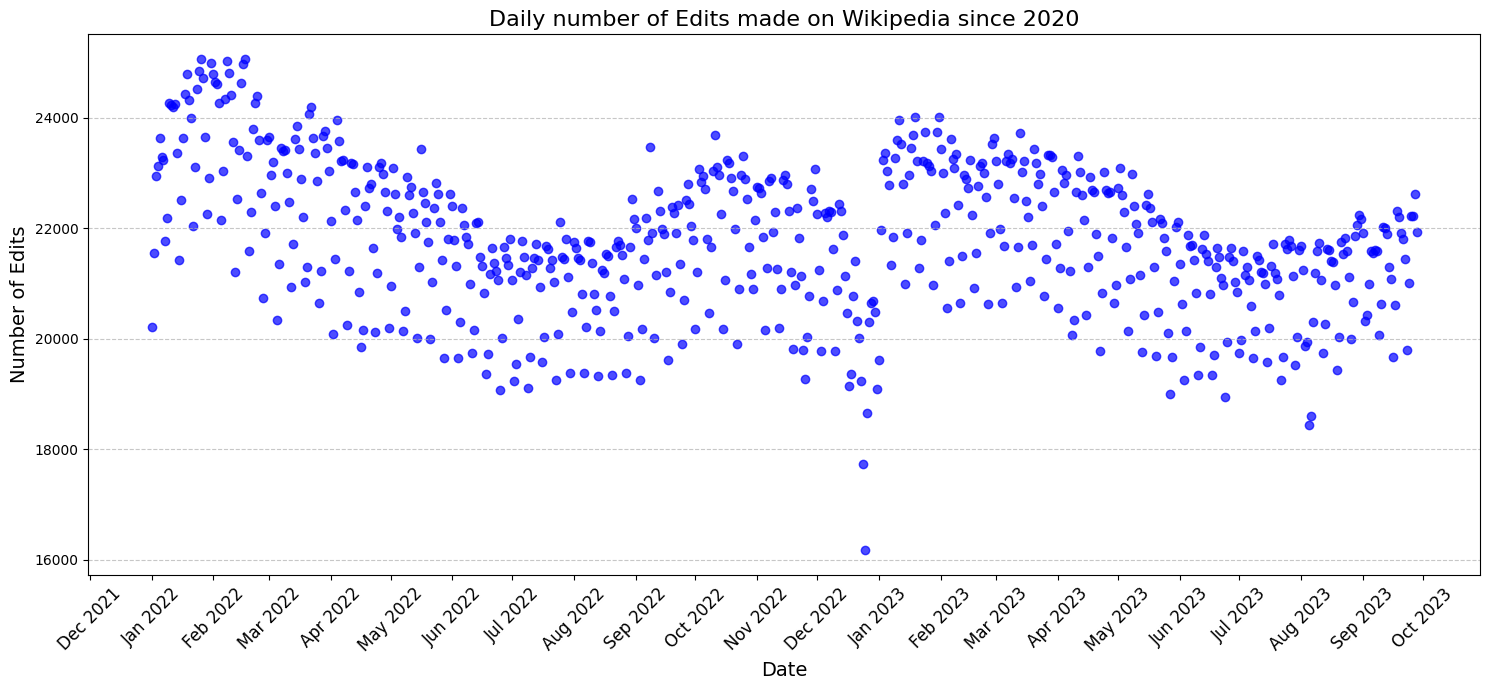

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv('daily_revisions_2022.csv')

data['date'] = pd.to_datetime(data['date'])

plt.figure(figsize=(15, 7))
plt.scatter(data['date'], data['editors'], color='blue', alpha=0.7)

plt.title('Daily number of Edits made on Wikipedia since December 2021', fontsize=16)
plt.ylabel('Number of Edits', fontsize=14)
plt.xlabel('Date', fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()